In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [117]:
# ---- CONSTANTS ----
NG_EF = 0.8
HPSC_EF_Ind = 8  #(HP space cooling)
HPSH_EF_Ind = 6  #(HP space heating)
HPWH_EF_Ind = 4.0

HPSC_EF_Res = 5.0
HPSH_EF_Res = 4.0
HPWH_EF_Res = 4.0
HPWH_EF_Res = 4.0

In [9]:
FRE_raw = pd.read_csv("FRE2016_Dan_Kelvin.csv")
TUL_raw = pd.read_csv("TUL2016_Dan_kelvin.csv")

Tasks:
- Average kWh/ft^2 of NG & Electric for each building type
- Average square foot of each building type

In [86]:
#Calculate the total "statistic" for each building type
def total_statistic_per_bldgtype(csv, building_type, statistic, ylabel, title):
    from matplotlib.pyplot import figure
    total_datas = np.array([], dtype=np.float64)
    building_counts = np.array([], dtype=np.float64)


    for i in range(csv[building_type].unique().size):
        bldgtype = csv[building_type].unique()[i]
        
        total_data = csv[csv[building_type]==bldgtype][statistic].sum(skipna=True)
        building_count_data = csv[csv[building_type]==bldgtype][statistic].count()
        total_datas = np.append(total_datas, total_data)
        building_counts = np.append(building_counts, building_count_data)
    
    figure(figsize=(18, 6))
    plt.title(title)
    plt.xlabel("Building Type")
    plt.ylabel(ylabel)
    bars = plt.bar(csv[building_type].unique(), total_datas)
    
    i = 0
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x()+0.3, yval + (yval*0.01), str(building_counts[i]))# + " Buildings")
        i += 1
    
    return total_datas

In [87]:
#Calculate the average "statistic" for each building type
def avg_statistic_per_bldgtype(csv, building_type, statistic, ylabel, title):
    from matplotlib.pyplot import figure
    avg_datas = np.array([], dtype=np.float64)
    building_counts = np.array([], dtype=np.float64)


    for i in range(csv[building_type].unique().size):
        bldgtype = csv[building_type].unique()[i]
        
        avg_data = csv[csv[building_type]==bldgtype][statistic].mean(skipna=True)
        building_count_data = csv[csv[building_type]==bldgtype][statistic].count()
        avg_datas = np.append(avg_datas, avg_data)
        building_counts = np.append(building_counts, building_count_data)

    figure(figsize=(18, 6))
    plt.title(title)
    plt.xlabel("Building Type")
    plt.ylabel(ylabel)
    bars = plt.bar(csv[building_type].unique(), avg_datas)
    
    i = 0
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x()+0.3, yval + (yval*0.01), str(building_counts[i]))# + " Buildings")
        i += 1
    
    return avg_datas, building_counts

array([10196900., 25980136.,   684434.,  8089852.,  3133054.,  3631832.,
       15377584.,   465072.,  3981647.,   980515.,  1341276.,   982396.])

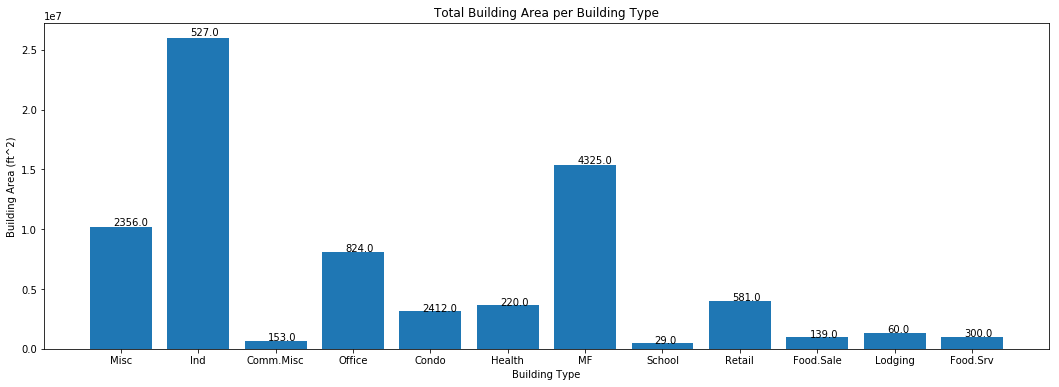

In [88]:
total_statistic_per_bldgtype(TUL_raw, 'TYPE', 'BLDGAREA', 'Building Area (ft^2)', 'Total Building Area per Building Type')

(array([ 4328.05602716, 49298.17077799,  4473.4248366 ,  9817.7815534 ,
         1298.94444444, 16508.32727273,  3555.51075145, 16036.96551724,
         6853.0929432 ,  7054.0647482 , 22354.6       ,  3274.65333333]),
 array([2356.,  527.,  153.,  824., 2412.,  220., 4325.,   29.,  581.,
         139.,   60.,  300.]))

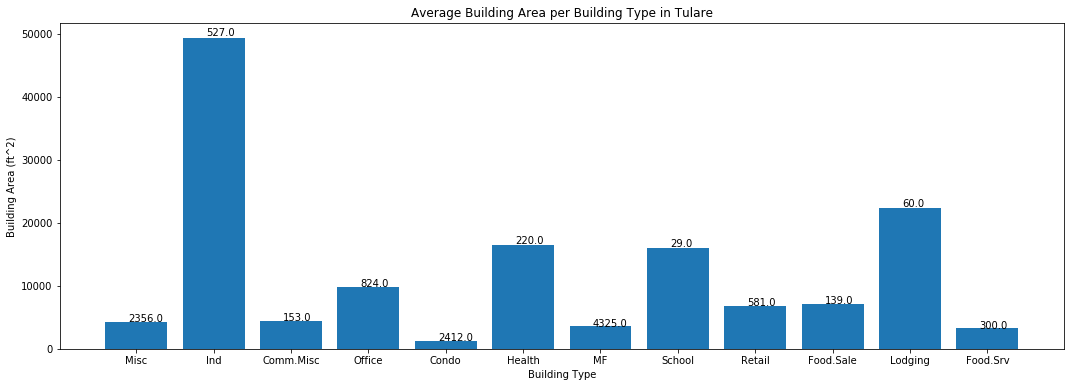

In [89]:
avg_statistic_per_bldgtype(TUL_raw, 'TYPE', 'BLDGAREA', 'Building Area (ft^2)', 'Average Building Area per Building Type in Tulare')

(array([ 4328.05602716, 52601.19847328,  4473.4248366 ,  9817.7815534 ,
         1298.94444444, 16508.32727273, 49043.85714286, 50152.30555556,
         3555.51075145, 81790.76923077, 16036.96551724,  6853.0929432 ,
        42526.7124183 ,  7054.0647482 , 22354.6       ,  3274.65333333]),
 array([2356.,  131.,  153.,  824., 2412.,  220.,   14.,  216., 4325.,
          13.,   29.,  581.,  153.,  139.,   60.,  300.]))

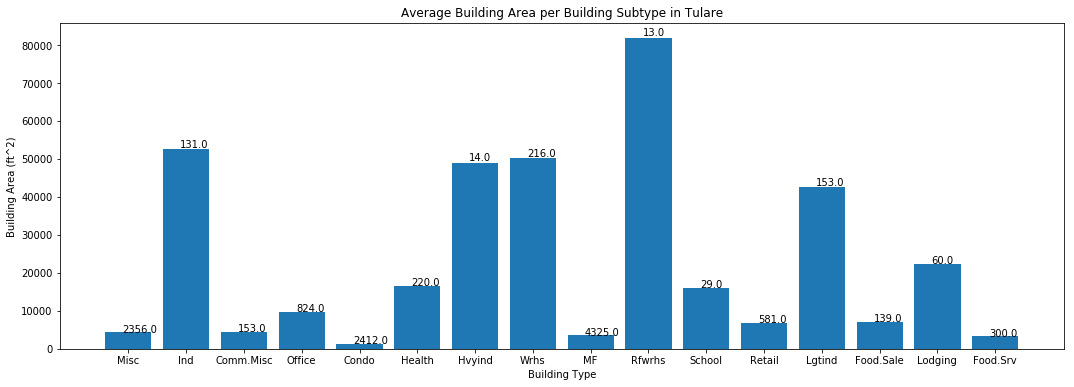

In [55]:
avg_statistic_per_bldgtype(TUL_raw, 'Typef', 'BLDGAREA', 'Building Area (ft^2)', 'Average Building Area per Building Subtype in Tulare')

(array([ 1233.92385787,  2709.99586777, 70010.26539101,  3954.76460768,
        12236.11466667,  6271.06491372, 11932.79624665, 10921.7808277 ,
         7290.68467882, 10859.01315789, 28358.78846154, 62135.83333333,
        11580.57723577, 56741.35      ]),
 array([1.0244e+04, 4.8400e+02, 3.6060e+03, 5.9900e+02, 7.5000e+02,
        2.4340e+03, 1.8650e+03, 2.3680e+03, 9.2160e+03, 3.8000e+02,
        1.5600e+02, 6.0000e+00, 1.2300e+02, 2.0000e+01]))

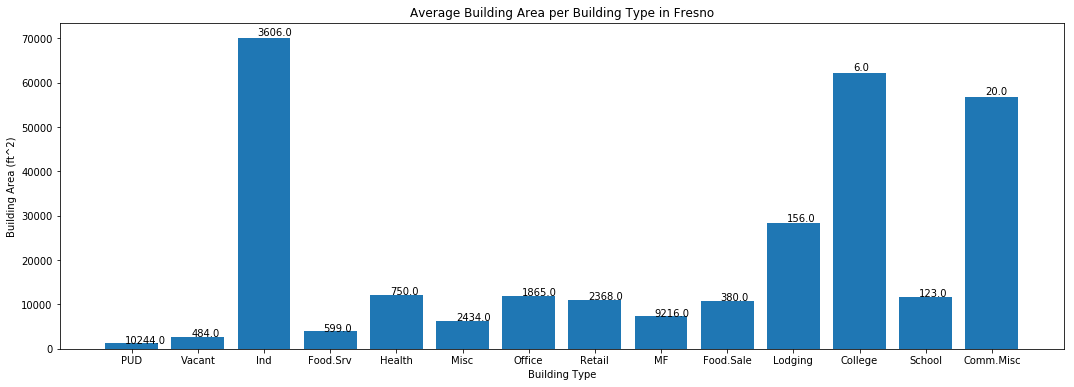

In [56]:
avg_statistic_per_bldgtype(FRE_raw, 'TYPE', 'BLDGAREA', 'Building Area (ft^2)', 'Average Building Area per Building Type in Fresno')

(array([ 1233.92385787,  2709.99586777, 74253.71076923,  3954.76460768,
        12236.11466667,  6271.06491372, 11932.79624665, 10921.7808277 ,
         7290.68467882, 31270.94662921, 10859.01315789, 28358.78846154,
        62135.83333333, 11580.57723577, 56741.35      ]),
 array([1.0244e+04, 4.8400e+02, 3.2500e+03, 5.9900e+02, 7.5000e+02,
        2.4340e+03, 1.8650e+03, 2.3680e+03, 9.2160e+03, 3.5600e+02,
        3.8000e+02, 1.5600e+02, 6.0000e+00, 1.2300e+02, 2.0000e+01]))

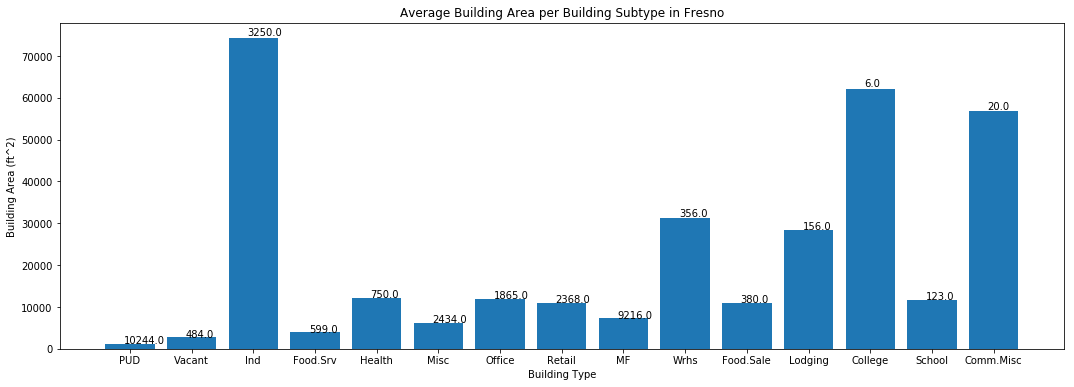

In [57]:
avg_statistic_per_bldgtype(FRE_raw, 'Typef', 'BLDGAREA', 'Building Area (ft^2)', 'Average Building Area per Building Subtype in Fresno')

(array([ 4.36014326,  3.54525609,  4.17212846,  2.92060809,  3.53743613,
         6.80736827,  3.16899487,  2.68845124,  4.95805021,  6.09644567,
         3.2216026 ,  2.0095249 ,  4.26280048,  4.38010476, 11.8888251 ,
         4.12444102]),
 array([13145.,   243.,  1365.,  2174.,  2539.,   309.,    33.,   370.,
         6095.,    27.,   336.,   983.,   292.,   182.,    92.,   408.]))

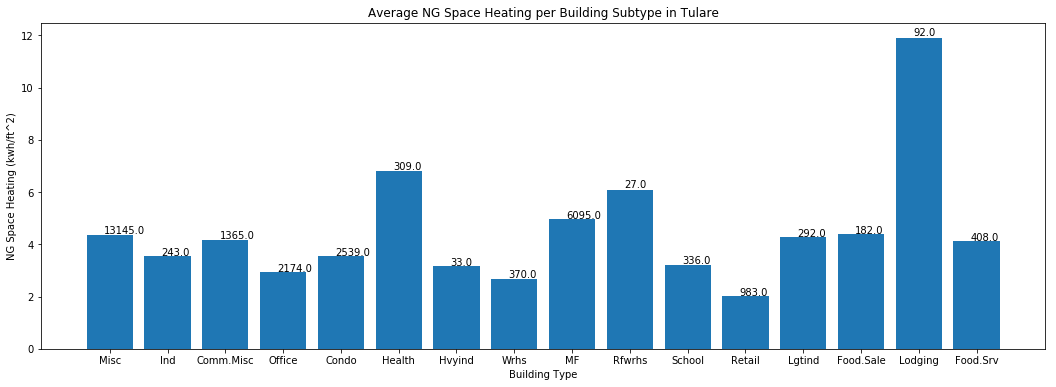

In [58]:
avg_statistic_per_bldgtype(TUL_raw, 'Typef', 'NGEUISH', 'NG Space Heating (kwh/ft^2)', 'Average NG Space Heating per Building Subtype in Tulare')

(array([        nan,         nan,  5.63484987,  5.09902514,  6.73249292,
         4.70376708,  6.21486848,  4.45029823,  6.88328865,  4.91668733,
         6.77576515, 13.83282072,  0.68564993, 12.043521  ,  5.20486871]),
 array([   0.,    0., 3335.,  600.,  760., 4639., 1935., 2370., 9249.,
         358.,  382.,  161.,   42.,  129.,   54.]))

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


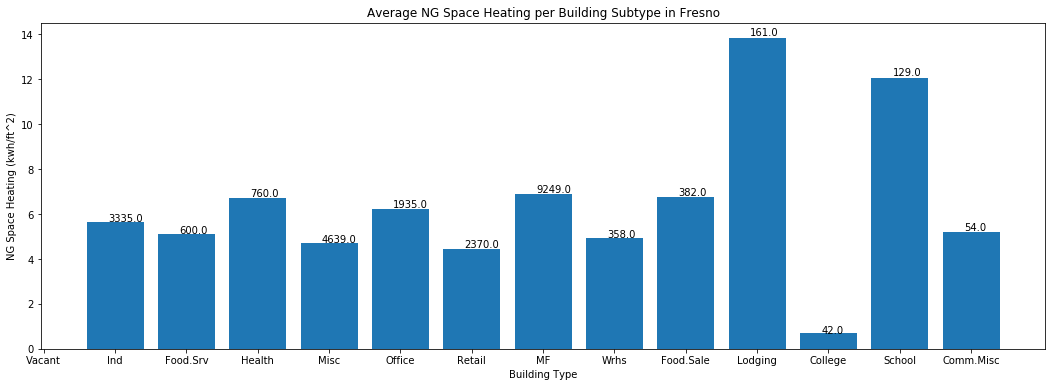

In [59]:
avg_statistic_per_bldgtype(FRE_raw, 'Typef', 'NGEUISH', 'NG Space Heating (kwh/ft^2)', 'Average NG Space Heating per Building Subtype in Fresno')

(array([1.26971634, 0.32600869, 1.26452403, 0.25511284, 3.32621572,
        8.63145998, 0.25016689, 0.08496662, 3.28279324, 0.08731422,
        0.60027237, 0.08332522, 0.23605079, 0.56668766, 2.71674573,
        4.66951589]),
 array([13145.,   243.,  1365.,  2174.,  2539.,   309.,    33.,   370.,
         6095.,    27.,   336.,   983.,   292.,   182.,    92.,   408.]))

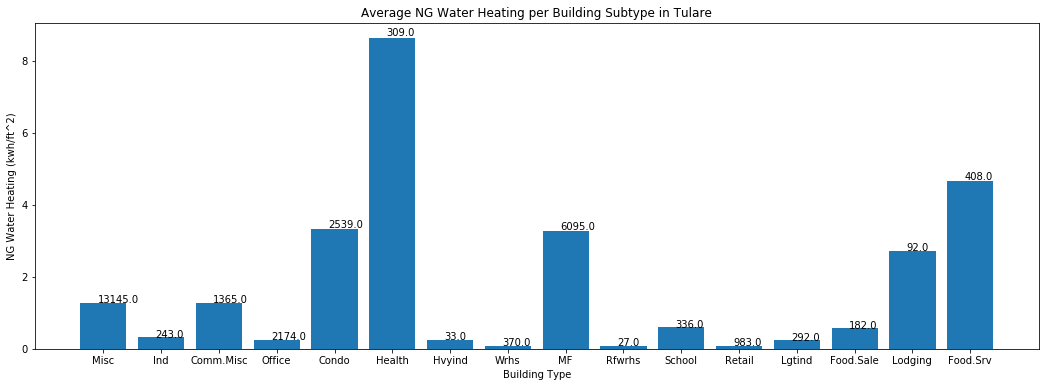

In [60]:
avg_statistic_per_bldgtype(TUL_raw, 'Typef', 'NGEUIWH', 'NG Water Heating (kwh/ft^2)', 'Average NG Water Heating per Building Subtype in Tulare')

(array([       nan,        nan, 0.06001892, 5.40674621, 9.39583976,
        1.47666595, 0.04333758, 0.04224744, 3.6559237 , 0.02270408,
        0.93665123, 3.01539333, 0.31895652, 1.09758778, 1.54384572]),
 array([   0.,    0., 3335.,  600.,  760., 4639., 1935., 2370., 9249.,
         358.,  382.,  161.,   42.,  129.,   54.]))

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


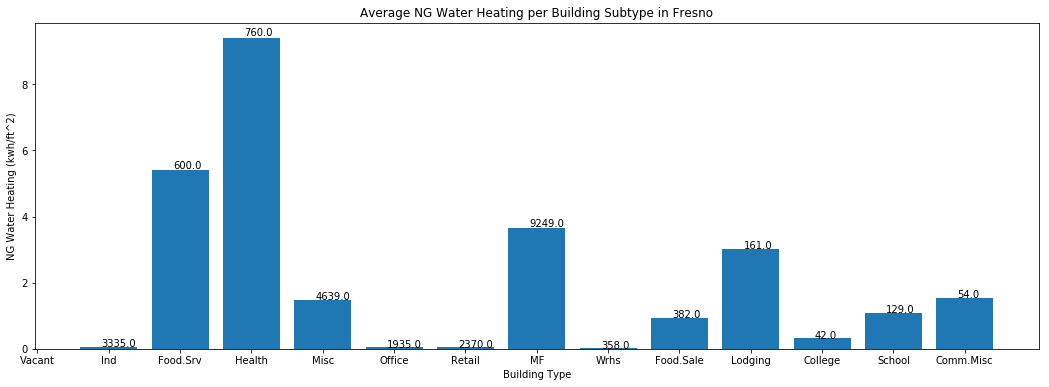

In [61]:
avg_statistic_per_bldgtype(FRE_raw, 'Typef', 'NGEUIWH', 'NG Water Heating (kwh/ft^2)', 'Average NG Water Heating per Building Subtype in Fresno')

(array([ 9.84096395,  0.        ,  9.30439919, 13.26500869,  2.0426221 ,
        37.17219689,  0.        ,  3.97410079,  3.6178882 , 10.17549079,
         1.77141868, 12.47295808,  0.        , 15.1761631 , 11.23020793,
        24.31364705]),
 array([13145.,   243.,  1365.,  2174.,  2539.,   309.,    33.,   370.,
         6095.,    27.,   336.,   983.,   292.,   182.,    92.,   408.]))

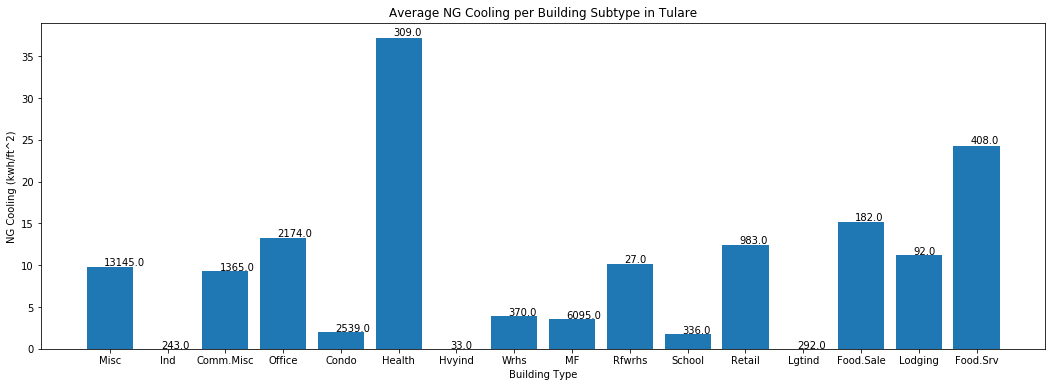

In [62]:
avg_statistic_per_bldgtype(TUL_raw, 'Typef', 'NGEUIC', 'NG Cooling (kwh/ft^2)', 'Average NG Cooling per Building Subtype in Tulare')

(array([        nan,         nan,  0.        , 15.53947795, 33.88917866,
         9.00592545, 17.69485285,  8.96062796,  4.02267364,  6.15356732,
        26.14270145, 10.78824892,  3.1015288 ,  1.0005834 ,  9.85743206]),
 array([   0.,    0., 3335.,  600.,  760., 4639., 1935., 2370., 9249.,
         358.,  382.,  161.,   42.,  129.,   54.]))

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


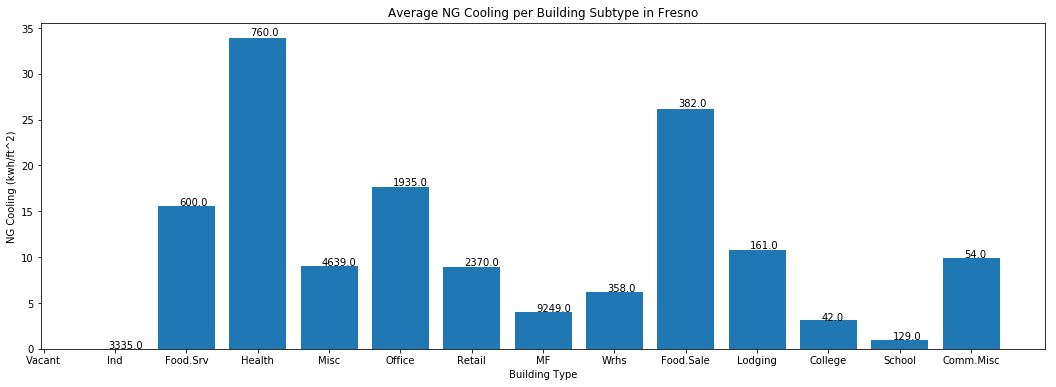

In [63]:
avg_statistic_per_bldgtype(FRE_raw, 'Typef', 'NGEUIC', 'NG Cooling (kwh/ft^2)', 'Average NG Cooling per Building Subtype in Fresno')

(array([11.74012291, 24.89418778, 10.7704274 , 17.95657638,  5.45433598,
        49.84971533, 25.45084267,  9.94390288, 11.54210991, 10.26623597,
         2.75714083, 17.03938384, 28.17372271, 30.20839481, 18.0283538 ,
        31.74297877]),
 array([13145.,   243.,  1365.,  2174.,  2539.,   309.,    33.,   370.,
         6095.,    27.,   336.,   983.,   292.,   182.,    92.,   408.]))

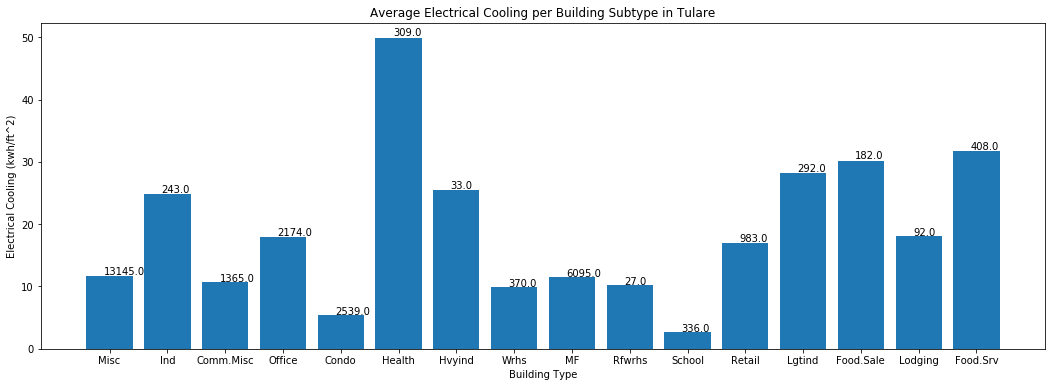

In [64]:
avg_statistic_per_bldgtype(TUL_raw, 'Typef', 'EEUIC', 'Electrical Cooling (kwh/ft^2)', 'Average Electrical Cooling per Building Subtype in Tulare')

(array([        nan,         nan, 34.69093956, 32.21744051, 57.16376   ,
        12.86685567, 32.87121226, 19.53705192,  2.58155733, 19.51544856,
        65.20214072,  3.32416844,  4.3720769 ,  1.51424854, 13.75916366]),
 array([   0.,    0., 3335.,  600.,  760., 4639., 1935., 2370., 9249.,
         358.,  382.,  161.,   42.,  129.,   54.]))

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


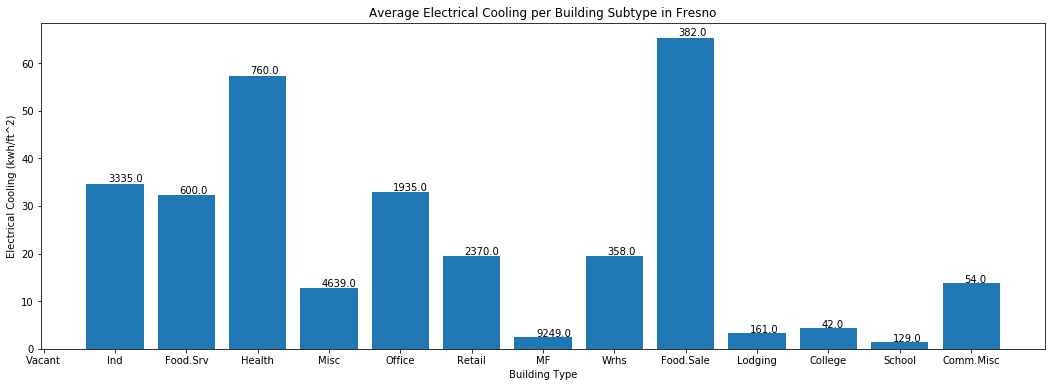

In [65]:
avg_statistic_per_bldgtype(FRE_raw, 'Typef', 'EEUIC', 'Electrical Cooling (kwh/ft^2)', 'Average Electrical Cooling per Building Subtype in Fresno')

(array([ 0.   ,  3.896,  0.   ,  0.   ,  0.   ,  0.   , 26.699,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  3.896,  0.   ,  0.   ,  0.   ]),
 array([13145.,   243.,  1365.,  2174.,  2539.,   309.,    33.,   370.,
         6095.,    27.,   336.,   983.,   292.,   182.,    92.,   408.]))

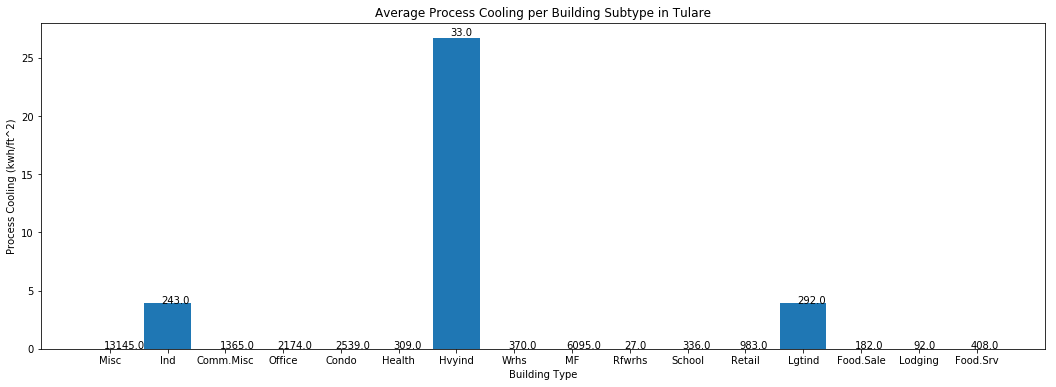

In [66]:
avg_statistic_per_bldgtype(TUL_raw, 'Typef', 'EEUIPC', 'Process Cooling (kwh/ft^2)', 'Average Process Cooling per Building Subtype in Tulare')

(array([  nan,   nan, 3.896, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]),
 array([   0.,    0., 3335.,  600.,  760., 4639., 1935., 2370., 9249.,
         358.,  382.,  161.,   42.,  129.,   54.]))

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


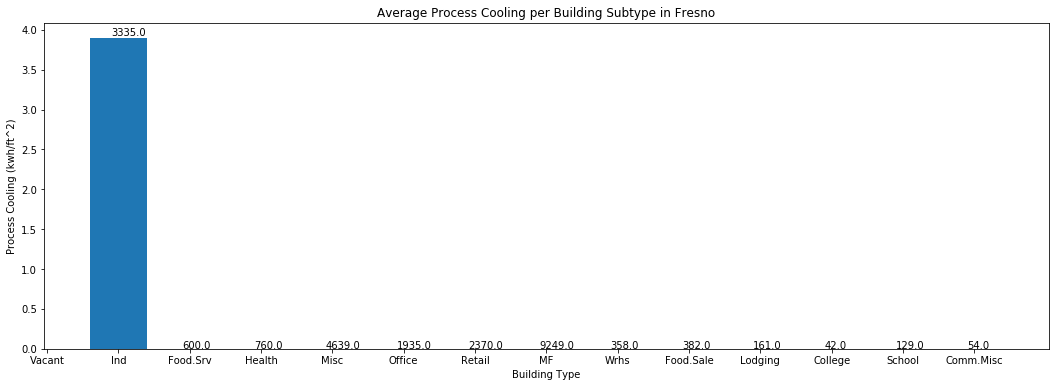

In [67]:
avg_statistic_per_bldgtype(FRE_raw, 'Typef', 'EEUIPC', 'Process Cooling (kwh/ft^2)', 'Average Process Cooling per Building Subtype in Fresno')

(array([        nan,         nan, 34.69093956, 32.21744051, 57.16376   ,
        12.86685567, 32.87121226, 19.53705192,  2.58155733, 19.51544856,
        65.20214072,  3.32416844,  4.3720769 ,  1.51424854, 13.75916366]),
 array([   0.,    0., 3335.,  600.,  760., 4639., 1935., 2370., 9249.,
         358.,  382.,  161.,   42.,  129.,   54.]))

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


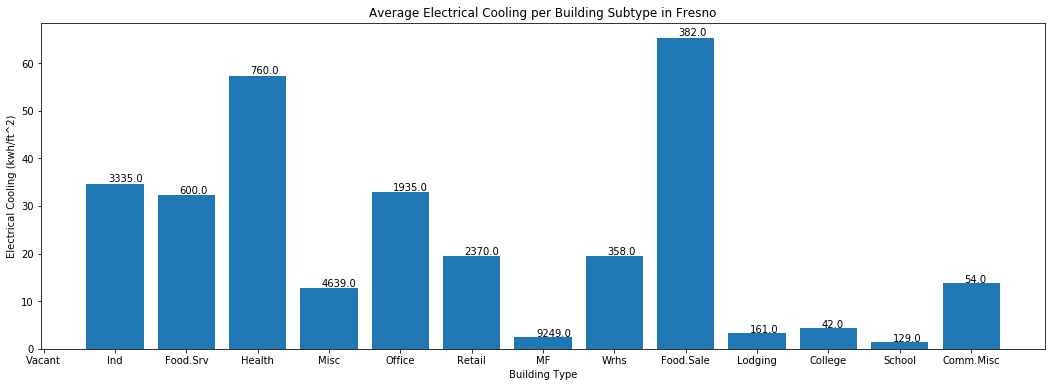

In [68]:
avg_statistic_per_bldgtype(FRE_raw, 'Typef', 'EEUIC', 'Electrical Cooling (kwh/ft^2)', 'Average Electrical Cooling per Building Subtype in Fresno')

In [106]:
#Calculates the total amount of buildings per building type (a specific version of total_statistic_per_bldgtype_no_plot)
def total_bldgs_per_type(csv, building_type):
    total_datas = np.array([], dtype=np.float64)
    
    for i in range(csv[building_type].unique().size):
        bldgtype = csv[building_type].unique()[i]
        
        total_data = csv[csv[building_type]==bldgtype][building_type].count()
        total_datas = np.append(total_datas, total_data)
    
    return total_datas

In [107]:
total_bldgs_per_type(TUL_raw, 'Typef')

array([13145.,   243.,  1365.,  2174.,  2539.,   309.,    33.,   370.,
        6095.,    27.,   336.,   983.,   292.,   182.,    92.,   408.])

In [78]:
#Calculate the total "statistic" for each building type
def total_statistic_per_bldgtype_no_plot(csv, building_type, statistic):
    total_datas = np.array([], dtype=np.float64)
    building_counts = np.array([], dtype=np.float64)


    for i in range(csv[building_type].unique().size):
        bldgtype = csv[building_type].unique()[i]
        
        total_data = csv[csv[building_type]==bldgtype][statistic].sum(skipna=True)
        building_count_data = csv[csv[building_type]==bldgtype][statistic].count()
        total_datas = np.append(total_datas, total_data)
        building_counts = np.append(building_counts, building_count_data)
    
    return total_datas

In [79]:
total_statistic_per_bldgtype_no_plot(TUL_raw, 'Typef', 'BLDGAREA')

array([10196900.,  6890757.,   684434.,  8089852.,  3133054.,  3631832.,
         686614., 10832898., 15377584.,  1063280.,   465072.,  3981647.,
        6506587.,   980515.,  1341276.,   982396.])

In [75]:
#Calculate the average "statistic" for each building type
def avg_statistic_per_bldgtype_no_plot(csv, building_type, statistic):
    avg_datas = np.array([], dtype=np.float64)
    building_counts = np.array([], dtype=np.float64)


    for i in range(csv[building_type].unique().size):
        bldgtype = csv[building_type].unique()[i]
        
        avg_data = csv[csv[building_type]==bldgtype][statistic].mean(skipna=True)
        building_count_data = csv[csv[building_type]==bldgtype][statistic].count()
        avg_datas = np.append(avg_datas, avg_data)
        building_counts = np.append(building_counts, building_count_data)
    
    return avg_datas

In [76]:
avg_statistic_per_bldgtype_no_plot(TUL_raw, 'Typef', 'BLDGAREA')

array([ 4328.05602716, 52601.19847328,  4473.4248366 ,  9817.7815534 ,
        1298.94444444, 16508.32727273, 49043.85714286, 50152.30555556,
        3555.51075145, 81790.76923077, 16036.96551724,  6853.0929432 ,
       42526.7124183 ,  7054.0647482 , 22354.6       ,  3274.65333333])

In [120]:
avg_ngeuish

array([ 4.36014326,  3.54525609,  4.17212846,  2.92060809,  3.53743613,
        6.80736827,  3.16899487,  2.68845124,  4.95805021,  6.09644567,
        3.2216026 ,  2.0095249 ,  4.26280048,  4.38010476, 11.8888251 ,
        4.12444102])

In [122]:
avg_ngeuish * NG_EF / HPSH_EF_Ind

array([0.58135244, 0.47270081, 0.55628379, 0.38941441, 0.47165815,
       0.9076491 , 0.42253265, 0.35846017, 0.66107336, 0.81285942,
       0.42954701, 0.26793665, 0.5683734 , 0.58401397, 1.58517668,
       0.54992547])

In [123]:
building_types = TUL_raw['Typef'].unique()
avg_bldgarea = avg_statistic_per_bldgtype_no_plot(TUL_raw, 'Typef', 'BLDGAREA')
avg_ngeuish = avg_statistic_per_bldgtype_no_plot(TUL_raw, 'Typef', 'NGEUISH')
avg_ngeuiwh = avg_statistic_per_bldgtype_no_plot(TUL_raw, 'Typef', 'NGEUIWH')
avg_ngeuic = avg_statistic_per_bldgtype_no_plot(TUL_raw, 'Typef', 'NGEUIC')
avg_eeuic = avg_statistic_per_bldgtype_no_plot(TUL_raw, 'Typef', 'EEUIC')
avg_eeuipc = avg_statistic_per_bldgtype_no_plot(TUL_raw, 'Typef', 'EEUIPC')
tot_bldgarea = total_statistic_per_bldgtype_no_plot(TUL_raw, 'Typef', 'BLDGAREA')
tot_bldgs_per_type = total_bldgs_per_type(TUL_raw, 'Typef')
avg_eeuish = avg_ngeuish * NG_EF / HPSH_EF_Ind
avg_eeuiwh = avg_ngeuiwh * NG_EF / HPWH_EF_Ind


tul_df = pd.DataFrame(data={
                        'Avg. Building Area':avg_bldgarea,
                        'Avg. Electric Cooling':avg_eeuic,
                        'Avg. Natural Gas Cooling':avg_ngeuic,
                        'Avg. Natural Gas Space Heating':avg_ngeuish,
                        'Avg. Natural Gas Water Heating':avg_ngeuiwh,
                        'Avg. Process Cooling':avg_eeuipc, 
                        'Building Types':building_types,
                        'Total Buildings':tot_bldgs_per_type,
                        'Total Building Area':tot_bldgarea,
                        'Avg. Electrical Space Heating':avg_eeuish,
                        'Avg. Electrical Water Heating':avg_eeuiwh
                       })
tul_df

,Avg. Building Area,Avg. Electric Cooling,Avg. Natural Gas Cooling,Avg. Natural Gas Space Heating,Avg. Natural Gas Water Heating,Avg. Process Cooling,Building Types,Total Buildings,Total Building Area,Avg. Electrical Space Heating,Avg. Electrical Water Heating
0,4328.056027,11.740123,9.840964,4.360143,1.269716,0.000,Misc,13145.0,10196900.0,0.581352,0.253943
1,52601.198473,24.894188,0.000000,3.545256,0.326009,3.896,Ind,243.0,6890757.0,0.472701,0.065202
2,4473.424837,10.770427,9.304399,4.172128,1.264524,0.000,Comm.Misc,1365.0,684434.0,0.556284,0.252905
3,9817.781553,17.956576,13.265009,2.920608,0.255113,0.000,Office,2174.0,8089852.0,0.389414,0.051023
4,1298.944444,5.454336,2.042622,3.537436,3.326216,0.000,Condo,2539.0,3133054.0,0.471658,0.665243
5,16508.327273,49.849715,37.172197,6.807368,8.631460,0.000,Health,309.0,3631832.0,0.907649,1.726292
6,49043.857143,25.450843,0.000000,3.168995,0.250167,26.699,Hvyind,33.0,686614.0,0.422533,0.050033
7,50152.305556,9.943903,3.974101,2.688451,0.084967,0.000,Wrhs,370.0,10832898.0,0.358460,0.016993
8,3555.510751,11.542110,3.617888,4.958050,3.282793,0.000,MF,6095.0,15377584.0,0.661073,0.656559
9,81790.769231,10.266236,10.175491,6.096446,0.087314,0.000,Rfwrhs,27.0,1063280.0,0.812859,0.017463


In [73]:
building_types = FRE_raw['Typef'].unique()
avg_bldgarea = avg_statistic_per_bldgtype_no_plot(FRE_raw, 'Typef', 'BLDGAREA')
avg_ngeuish = avg_statistic_per_bldgtype_no_plot(FRE_raw, 'Typef', 'NGEUISH')
avg_ngeuiwh = avg_statistic_per_bldgtype_no_plot(FRE_raw, 'Typef', 'NGEUIWH')
avg_ngeuic = avg_statistic_per_bldgtype_no_plot(FRE_raw, 'Typef', 'NGEUIC')
avg_eeuic = avg_statistic_per_bldgtype_no_plot(FRE_raw, 'Typef', 'EEUIC')
avg_eeuipc = avg_statistic_per_bldgtype_no_plot(FRE_raw, 'Typef', 'EEUIPC')

fre_df = pd.DataFrame(data={'Building Types':building_types, 
                        'Avg. Building Area':avg_bldgarea,
                        'Avg. Natural Gas Space Heating':avg_ngeuish,
                        'Avg. Natural Gas Water Heating':avg_ngeuiwh,
                        'Avg. Natural Gas Cooling':avg_ngeuic,
                        'Avg. Electric Cooling':avg_eeuic,
                        'Avg. Process Cooling':avg_eeuipc                       
                       })
fre_df

,Building Types,Avg. Building Area,Avg. Natural Gas Space Heating,Avg. Natural Gas Water Heating,Avg. Natural Gas Cooling,Avg. Electric Cooling,Avg. Process Cooling
0,PUD,1233.923858,NaN,NaN,NaN,NaN,NaN
1,Vacant,2709.995868,NaN,NaN,NaN,NaN,NaN
2,Ind,74253.710769,5.634850,0.060019,0.000000,34.690940,3.896
3,Food.Srv,3954.764608,5.099025,5.406746,15.539478,32.217441,0.000
4,Health,12236.114667,6.732493,9.395840,33.889179,57.163760,0.000
5,Misc,6271.064914,4.703767,1.476666,9.005925,12.866856,0.000
6,Office,11932.796247,6.214868,0.043338,17.694853,32.871212,0.000
7,Retail,10921.780828,4.450298,0.042247,8.960628,19.537052,0.000
8,MF,7290.684679,6.883289,3.655924,4.022674,2.581557,0.000
9,Wrhs,31270.946629,4.916687,0.022704,6.153567,19.515449,0.000
